### **Introduction - Four Shapes**
The Four shapes dataset is one of the great dataset for starting to learn classification basics. The dataset is obtained from Kaggle website in which images of four shapes like circle, square, star and triangle are available.

**Problem Context**
The *Four Shapes* dataset can be used for multiclass image classification task for classifying four shapes as circle, square, star and triangle. The dataset contains around 15k gray-scale images of size 200X200.

In this mini project, we will try to build a basic and simple model using sklearn **Logistic Regression**, **MLP Classifier** and **SVM** classifier and then compare its performance.

Import libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, cv2
import time

Load Dataset : convert image into 64x64, because 200x200 images will be very costly for computation

In [48]:
images = []
labels = []
file_path = 'C:/Users/g.singh.choudhary/Desktop/Python/GIT/tensorflow/Four Shapes/shapes/'
shapes = ['circle', 'square', 'star', 'triangle']

In [49]:
for shape in shapes:
    for path in os.listdir(file_path+shape):
        img = cv2.imread(file_path+shape+'/'+path, 0)
        img_array = np.asarray(cv2.resize(img, (64, 64)))
        images.append(img_array)
        labels.append(shapes.index(shape))

Randomly shuffle the data to make our model general and avoid pattern or biasing

In [60]:
dataset = list(zip(images, labels))
np.random.shuffle(dataset)
X, Y = zip(*dataset)
X = np.asarray(X)
Y = np.asarray(Y)

Lets plot few images and get insights to see, what are the different images we are dealing with.

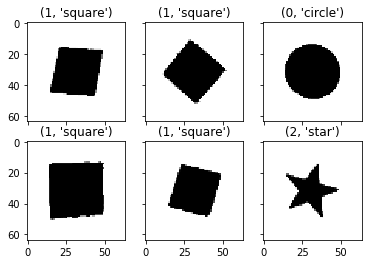

In [61]:
fig, ax = plt.subplots(2, 3, sharex = True, sharey = True)
ax = ax.flatten()
for i in range(6):
    ax[i].imshow(X[i], cmap = 'gray', interpolation = 'nearest')
    ax[i].set_title((Y[i], shapes[Y[i]]))
plt.show()

All the images seems fine and are labeled correctly. Now we can build the models using sklrean anf tf.

As mentioned previously, the first models we are going to use are **Logistic Regression** (LR), followed by **Support vector machine** (SVM). Because these two algorithms are the most robust and among the most effective machine learning algorithms. It should be noted that to train our LR and SVM on a set of images, we are first required to construct the training matrix for the SVM. Each row in this matrix corresponds to one image which is reshaped from two dimensional to one dimensional numpy array and each element in that row corresponds to one feature (which is 1 pixel) of the class that we wish to classify. And also, we should **normalize** out dataset to learn parameters faster and optimised

Important sklearn modules or classes or methods are imported

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier

In [63]:
X_norm = X/255.

X_train, X_test, Y_train, Y_test = train_test_split(X.reshape(X.shape[0], -1), Y, test_size = 0.2, random_state = 0)

In [84]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((11976, 4096), (2994, 4096), (11976,), (2994,))

### Model - 1. LR 

In [78]:
start = time.time()
lr = LogisticRegression()
lr.fit(X_train, Y_train)
end = time.time()

In [91]:
Y_pred =  lr.predict(X_test)
print('Time Taken to train LR model : ',(end-start),' sec')
print('\nAccuracy Score : ',accuracy_score(Y_test, Y_pred))
print('\n Classification Report : \n', classification_report(Y_test, Y_pred))

Time Taken to train LR model :  129.69389390945435  sec

Accuracy Score :  1.0

 Classification Report : 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       727
          1       1.00      1.00      1.00       755
          2       1.00      1.00      1.00       766
          3       1.00      1.00      1.00       746

avg / total       1.00      1.00      1.00      2994



### Model - 2. SVM

In [81]:
start = time.time()
svc = SVC()
svc.fit(X_train, Y_train)
end = time.time()

In [92]:
Y_pred =  svc.predict(X_test)
print('Time Taken to train SVM model : ',(end-start),' sec')
print('\nAccuracy Score : ',accuracy_score(Y_test, Y_pred))
print('\n Classification Report : \n', classification_report(Y_test, Y_pred))

Time Taken to train SVM model :  129.69389390945435  sec

Accuracy Score :  0.257849031396

 Classification Report : 
              precision    recall  f1-score   support

          0       1.00      0.01      0.01       727
          1       0.25      1.00      0.40       755
          2       1.00      0.01      0.01       766
          3       1.00      0.01      0.02       746

avg / total       0.81      0.26      0.11      2994



### Model - 3. MLP Classifier

In [89]:
start = time.time()
mlp = MLPClassifier(hidden_layer_sizes = (500, 50), max_iter = 50)
mlp.fit(X_train, Y_train)
end = time.time()

In [93]:
Y_pred =  mlp.predict(X_test)
print('Time Taken to train SVM model : ',(end-start),' sec')
print('\nAccuracy Score : ',accuracy_score(Y_test, Y_pred))
print('\n Classification Report : \n', classification_report(Y_test, Y_pred))

Time Taken to train SVM model :  129.69389390945435  sec

Accuracy Score :  0.995991983968

 Classification Report : 
              precision    recall  f1-score   support

          0       0.99      0.99      0.99       727
          1       0.99      0.99      0.99       755
          2       1.00      1.00      1.00       766
          3       1.00      1.00      1.00       746

avg / total       1.00      1.00      1.00      2994



I have reduced the max_iter from dafault value 200 to 50 to process it faster. Still it's 3 times worse LR

# 
Here we can compare the accuracy and computational training time of all three models.<br>
**LR = 100% - 44 sec.<br>
SVM ~ 26% - 1260 sec. **(output show as a mistake, bacause that cell was run again after mlp, so it's showing mlp's running time)<br>
**MLP ~ 100% - 130 sec.**<br>
The *Logistic Regression* model performed the best, whereas, *SVM* was worst, even it was 100% accurate and three times faster than MLP. 
The dataset was very simple to classify images in four different classes using **LR**. but when dataset is little complex and number of classes are more, then **LR** , **MLP** and **SVM** are not the better model to classify multiple classes, bacause these models simply take pixels as features and learn. We'll see how **Convolutional Neural Network** helps to achieve the best accuracy and some awesome techniques like **CNN** layers and **Pooling**.

### LR, Simplest yet best ! :)